In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
import joblib

In [6]:
df = pd.read_csv("dataset_bank.csv")

In [7]:
df.head(5)

,TransactionID,AccountID,TransactionAmount,PreviousTransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 8:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 8:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 8:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 8:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 8:06:39


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   PreviousTransactionDate  2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [9]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


In [10]:
numerical_cols = df.select_dtypes(include=['number']).columns

In [11]:
correlation = df[numerical_cols].corr()

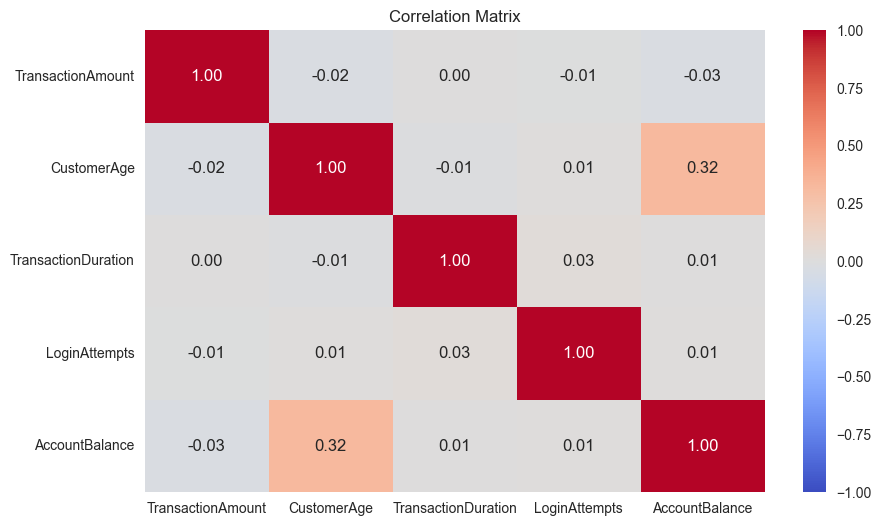

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation,
               annot=True,
               cmap='coolwarm',
               fmt=".2f",
               vmin=-1,
vmax=1)
plt.title('Correlation Matrix')
plt.show()

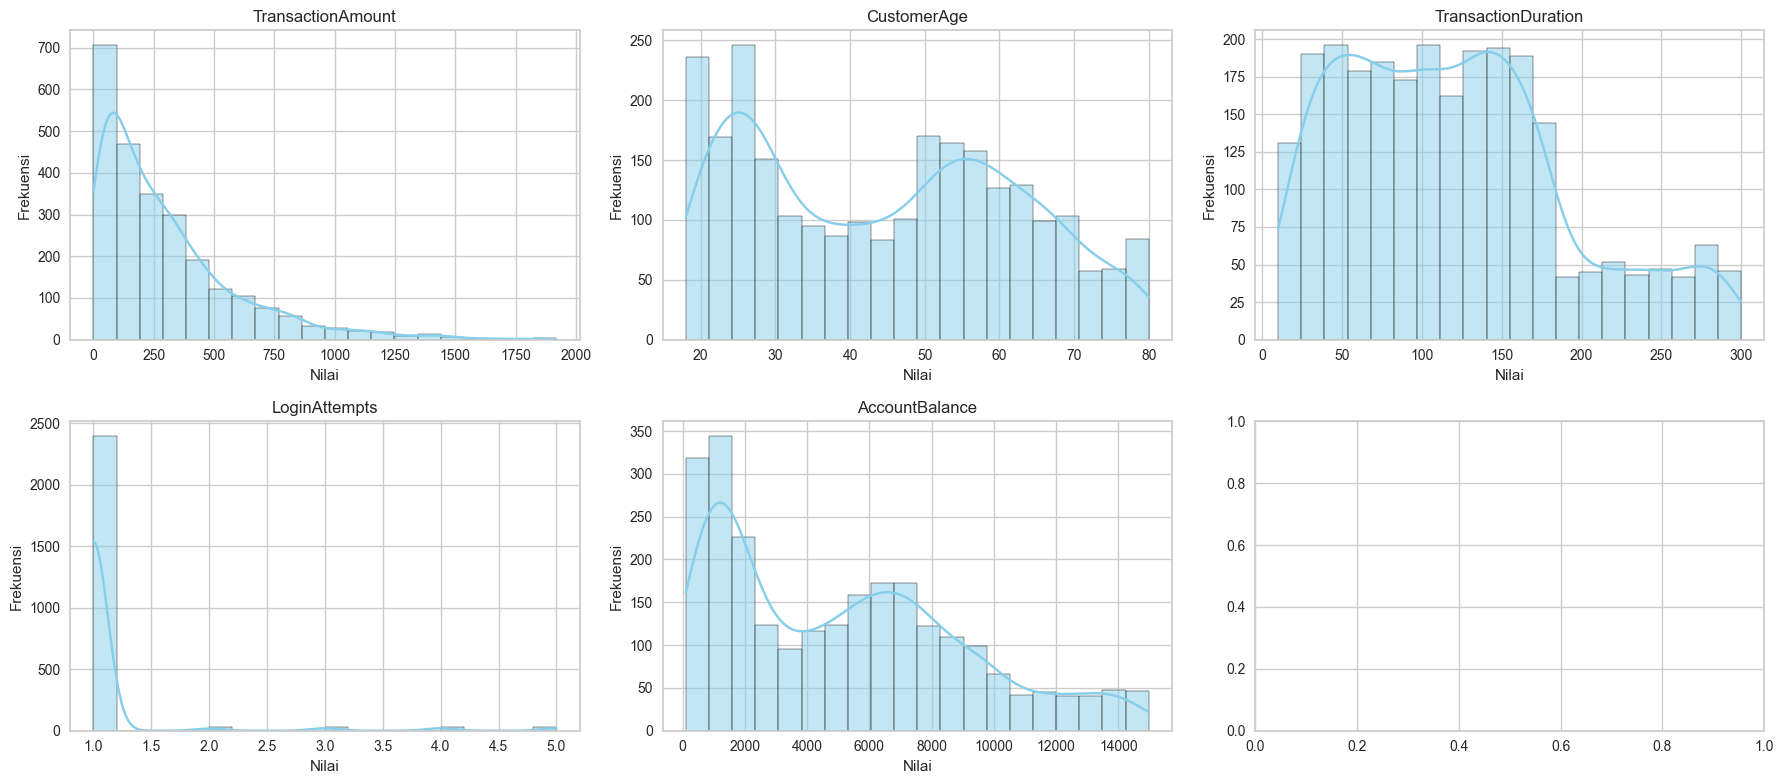

In [13]:
fig, axes = plt.subplots(2, 3, figsize=(18, 8))
axes = axes.flatten()

for i, column in enumerate(numerical_cols):

    sns.histplot(df[column], bins=20, kde=True, color='skyblue', ax=axes[i])

    axes[i].set_title(column)
    axes[i].set_xlabel("Nilai")
    axes[i].set_ylabel("Frekuensi")

plt.tight_layout()
plt.show()

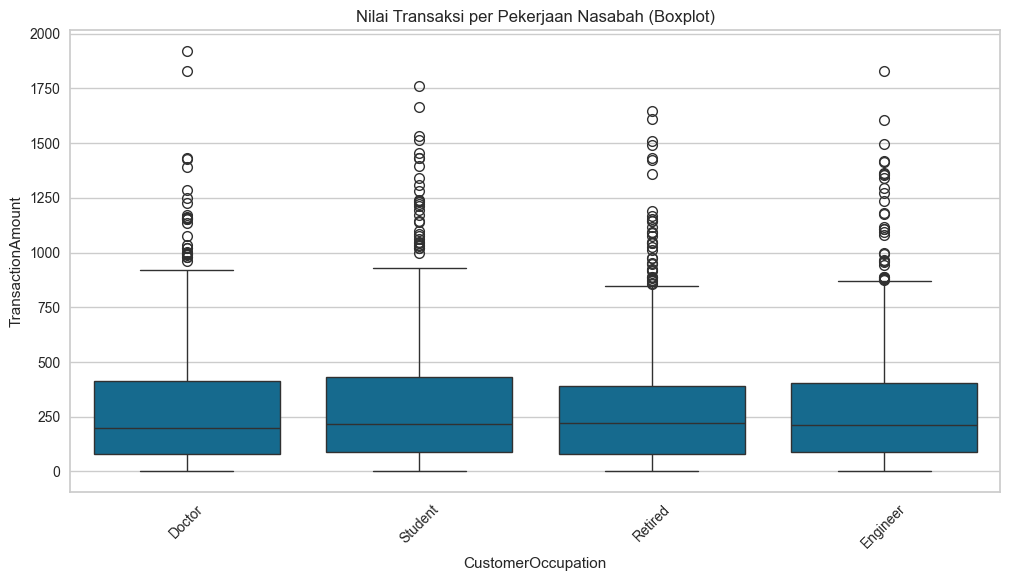

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='CustomerOccupation', y='TransactionAmount', data=df)
plt.title("Nilai Transaksi per Pekerjaan Nasabah (Boxplot)")
plt.xticks(rotation=45)

plt.show()

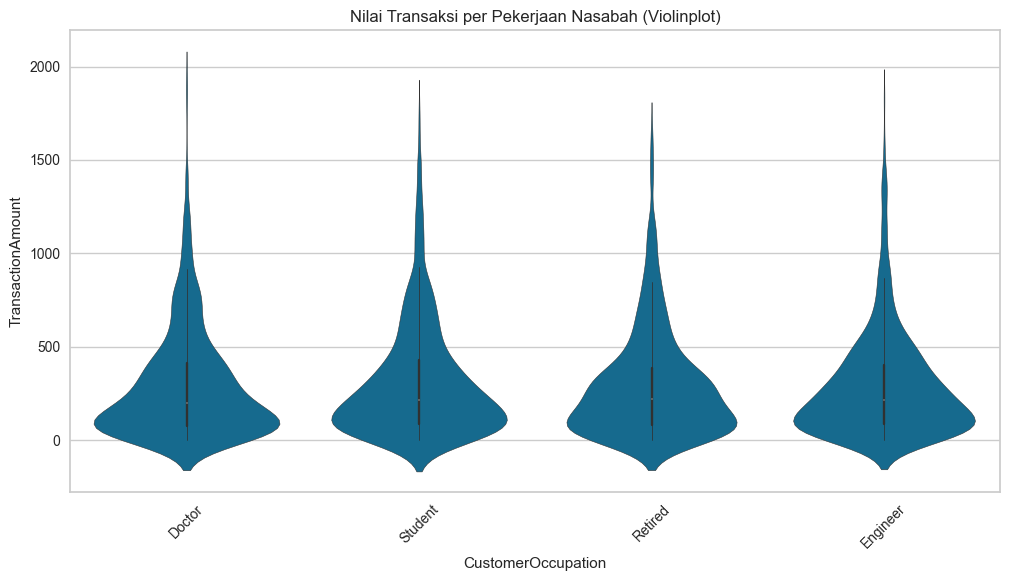

In [15]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='CustomerOccupation', y='TransactionAmount', data=df)
plt.title("Nilai Transaksi per Pekerjaan Nasabah (Violinplot)")
plt.xticks(rotation=45)
plt.show()

DATA PREPROCESSING

In [16]:
df.isnull().sum()

TransactionID              29
AccountID                  21
TransactionAmount          26
PreviousTransactionDate    28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
TransactionDate            24
dtype: int64

In [17]:
df.duplicated().sum()

np.int64(21)

In [18]:
df.dropna(inplace=True)

In [19]:
df.isnull().sum()

TransactionID              0
AccountID                  0
TransactionAmount          0
PreviousTransactionDate    0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
TransactionDate            0
dtype: int64

In [20]:
df.drop_duplicates(inplace=True)

In [21]:
df.duplicated().sum()

np.int64(0)

In [22]:
cols_to_drop = [col for col in df.columns if
                'id' in col.lower() or
                'ip' in col.lower() or
                'date' in col.lower()]

In [23]:
df = df.drop(columns=cols_to_drop)

In [24]:
categorical_cols = list(df.select_dtypes(include=['object']).columns)

encoders = {}
for column in categorical_cols:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
    encoders[column] = label_encoder

In [25]:
df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,14.09,1,36,0,70.0,0,81.0,1.0,5112.21
1,376.24,1,15,0,68.0,0,141.0,1.0,13758.91
2,126.29,1,23,2,19.0,3,56.0,1.0,1122.35
3,184.50,1,33,2,26.0,3,25.0,1.0,8569.06
5,92.15,1,28,0,18.0,3,172.0,1.0,781.68


In [26]:
df.columns.tolist()

['TransactionAmount',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance']

In [27]:
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [28]:
df.describe()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
count,1945.000000,1945.000000,1945.000000,1945.000000,1945.000000,1945.000000,1945.000000,1945.0,1945.000000
mean,256.838278,0.771722,21.299743,0.977378,44.693059,1.503342,119.225193,1.0,5100.811913
std,218.370197,0.419830,12.329250,0.804119,17.743453,1.135888,70.600647,0.0,3907.153333
min,0.260000,0.000000,0.000000,0.000000,18.000000,0.000000,10.000000,1.0,102.200000
25%,78.920000,1.000000,11.000000,0.000000,27.000000,0.000000,63.000000,1.0,1488.650000
50%,199.700000,1.000000,21.000000,1.000000,45.000000,1.000000,111.000000,1.0,4693.600000
75%,374.500000,1.000000,32.000000,2.000000,59.000000,3.000000,162.000000,1.0,7659.990000
max,903.190000,1.000000,42.000000,2.000000,80.000000,3.000000,300.000000,1.0,14977.990000


In [29]:
scaler = StandardScaler()

In [30]:
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [31]:
df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,-1.111922,1,36,0,1.426636,0,-0.541568,0.0,0.002918
1,0.546926,1,15,0,1.313889,0,0.308502,0.0,2.216531
2,-0.597984,1,23,2,-1.448403,3,-0.895763,0.0,-1.018513
3,-0.331350,1,33,2,-1.053790,3,-1.334965,0.0,0.887895
5,-0.754364,1,28,0,-1.504776,3,0.747704,0.0,-1.105726


In [32]:
col_to_bin = 'CustomerAge'

In [33]:
new_col_name = 'CustomerAge_Bin'

In [34]:
bin_labels = ['Young', 'Middle-aged', 'Senior']

In [35]:
df[new_col_name] = pd.qcut(df[col_to_bin], q=3, labels=bin_labels, duplicates='drop')

In [36]:
label_encoder = LabelEncoder()
df[new_col_name] = label_encoder.fit_transform(df[new_col_name])

In [37]:
encoders[new_col_name] = label_encoder
categorical_cols.extend([new_col_name])

In [38]:
df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,CustomerAge_Bin
0,-1.111922,1,36,0,1.426636,0,-0.541568,0.0,0.002918,1
1,0.546926,1,15,0,1.313889,0,0.308502,0.0,2.216531,1
2,-0.597984,1,23,2,-1.448403,3,-0.895763,0.0,-1.018513,2
3,-0.331350,1,33,2,-1.053790,3,-1.334965,0.0,0.887895,2
5,-0.754364,1,28,0,-1.504776,3,0.747704,0.0,-1.105726,2


In [39]:
#Menyimpan Hasil Pre-processing
df.to_csv('preprocessed_data.csv', index=False)
print('Data preprocessing telah berhasil disimpan ke preprocessed_data.csv')

Data preprocessing telah berhasil disimpan ke preprocessed_data.csv
